# One client

## No STG

In [1]:
from Data import prepare_data
from VFL import make_binary_models, train
train_loader, test_loader, input_dim_list = prepare_data(
    'BASEHOCK', num_clients=1)
models, top_model = make_binary_models(
    input_dim_list, type="FNN")
no_fs_history = train(models, top_model, train_loader, test_loader)

Trying to load the datasets from BASEHOCK
(1993, 4862) (1993,)
Client 0: Feature Index 0-2430
Server : Feature Index 2431-4861
Epoch: 1, Train Loss: 11.8714, Train Acc: 0.2632, Test Acc: 0.4970, Best Acc: 0.4970
Epoch: 2, Train Loss: 10.9332, Train Acc: 0.5265, Test Acc: 0.9628, Best Acc: 0.9628
Epoch: 3, Train Loss: 10.8070, Train Acc: 0.5297, Test Acc: 0.8484, Best Acc: 0.9628
Epoch: 4, Train Loss: 8.0540, Train Acc: 0.8176, Test Acc: 0.9819, Best Acc: 0.9819
Epoch: 5, Train Loss: 4.3222, Train Acc: 0.9947, Test Acc: 0.9965, Best Acc: 0.9965
Epoch: 6, Train Loss: 0.5353, Train Acc: 0.9961, Test Acc: 0.9990, Best Acc: 0.9990
Epoch: 7, Train Loss: 0.0964, Train Acc: 0.9990, Test Acc: 0.9995, Best Acc: 0.9995
Epoch: 8, Train Loss: 0.0470, Train Acc: 0.9995, Test Acc: 0.9990, Best Acc: 0.9995
Epoch: 9, Train Loss: 0.0389, Train Acc: 0.9985, Test Acc: 1.0000, Best Acc: 1.0000
Epoch: 10, Train Loss: 0.0276, Train Acc: 0.9990, Test Acc: 0.9995, Best Acc: 1.0000
Epoch: 11, Train Loss: 0.0188

## STG

Epoch: 1, Train Loss: 12.6933, Train Acc: 0.2021, Test Acc: 0.4330, Best Acc: 0.4330458207452165, Num Feats: 4862.0000
Epoch: 2, Train Loss: 12.2451, Train Acc: 0.2456, Test Acc: 0.5770, Best Acc: 0.577, Num Feats: 4862.0000
Epoch: 3, Train Loss: 12.1636, Train Acc: 0.6056, Test Acc: 0.7840, Best Acc: 0.783996475327291, Num Feats: 4862.0000
Epoch: 4, Train Loss: 11.8733, Train Acc: 0.8223, Test Acc: 0.9120, Best Acc: 0.911996475327291, Num Feats: 4862.0000
Epoch: 5, Train Loss: 10.1237, Train Acc: 0.8518, Test Acc: 0.9570, Best Acc: 0.9569894259818732, Num Feats: 4862.0000
Epoch: 6, Train Loss: 4.1344, Train Acc: 0.9440, Test Acc: 0.9825, Best Acc: 0.9824788519637462, Num Feats: 4862.0000
Epoch: 7, Train Loss: 2.2311, Train Acc: 0.9722, Test Acc: 0.9955, Best Acc: 0.9954859013091641, Num Feats: 4862.0000
Epoch: 8, Train Loss: 1.6106, Train Acc: 0.9879, Test Acc: 0.9905, Best Acc: 0.9954859013091641, Num Feats: 4862.0000
Epoch: 9, Train Loss: 1.6267, Train Acc: 0.9866, Test Acc: 0.9950,

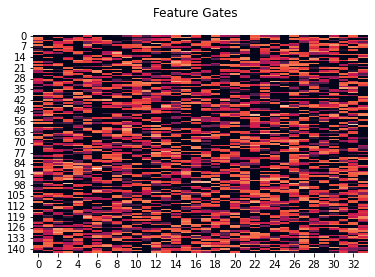

In [5]:
models, top_model = make_binary_models(
    input_dim_list, type="STG")
stg_history = train(models, top_model, train_loader, test_loader, 
                    save_dir='Checkpoints/stg-model-client1.pt',
                    log_dir='Logs/stg-model-client1.log',
                    mask_dir='Mask/client1/'
                    )

## Dual-STG

Epoch: 1, Train Loss: 13.6474, Train Acc: 0.4854, Test Acc: 0.4970, Best Acc: 0.497, Num Feats: 4862.0000, Num Emb: 256.0000
Epoch: 2, Train Loss: 13.3067, Train Acc: 0.4854, Test Acc: 0.4970, Best Acc: 0.497, Num Feats: 4862.0000, Num Emb: 256.0000
Epoch: 3, Train Loss: 13.2833, Train Acc: 0.4854, Test Acc: 0.4970, Best Acc: 0.497, Num Feats: 4862.0000, Num Emb: 256.0000
Epoch: 4, Train Loss: 12.9882, Train Acc: 0.4854, Test Acc: 0.5000, Best Acc: 0.5000211480362537, Num Feats: 4862.0000, Num Emb: 256.0000
Epoch: 5, Train Loss: 10.6506, Train Acc: 0.6820, Test Acc: 0.9059, Best Acc: 0.9058514602215508, Num Feats: 4862.0000, Num Emb: 256.0000
Epoch: 6, Train Loss: 7.5978, Train Acc: 0.9600, Test Acc: 0.9819, Best Acc: 0.9819365558912387, Num Feats: 4862.0000, Num Emb: 256.0000
Epoch: 7, Train Loss: 3.7207, Train Acc: 0.9806, Test Acc: 0.9785, Best Acc: 0.9819365558912387, Num Feats: 4862.0000, Num Emb: 256.0000
Epoch: 8, Train Loss: 3.3045, Train Acc: 0.9706, Test Acc: 0.9940, Best Acc

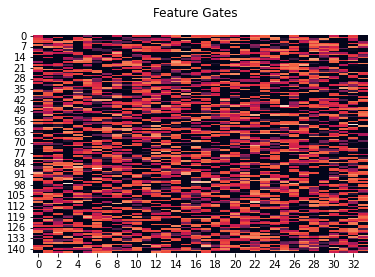

In [6]:
models, top_model = make_binary_models(
    input_dim_list, type="DualSTG")
dualstg_history = train(models, top_model, train_loader, test_loader, 
                    save_dir='Checkpoints/dualstg-model-client1.pt',
                    log_dir='Logs/dualstg-model-client1.log',
                    mask_dir='Mask/client1/'
                    )

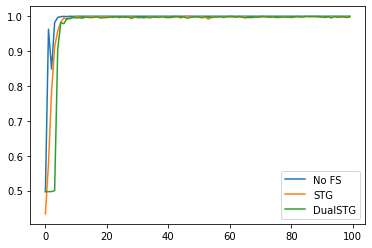

In [12]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.arange(100), no_fs_history['test_acc'], label='No FS')
plt.plot(np.arange(100), stg_history['test_acc'], label='STG')
plt.plot(np.arange(100), dualstg_history['test_acc'], label='DualSTG')
plt.legend()
plt.show()

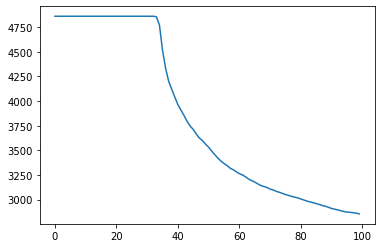

In [17]:
plt.plot(np.arange(100), dualstg_history['num_feats'], label='feats #')
plt.show()

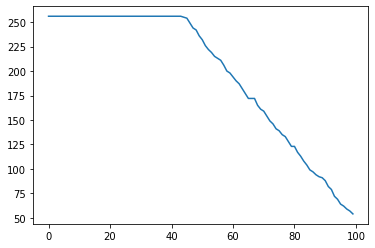

In [18]:
plt.plot(np.arange(100), dualstg_history['num_emb'], label='emb #')
plt.show()

---
# 2 clients

In [19]:
train_loader, test_loader, input_dim_list = prepare_data(
    'BASEHOCK', num_clients=2)

Trying to load the datasets from BASEHOCK
(1993, 4862) (1993,)
Client 0: Feature Index 0-1620
Client 1: Feature Index 1621-3241
Server : Feature Index 3242-4861


In [20]:
models, top_model = make_binary_models(
    input_dim_list, type="FNN")
no_fs_history = train(models, top_model, train_loader, test_loader)

Epoch: 1, Train Loss: 12.1342, Train Acc: 0.4854, Test Acc: 0.4970, Best Acc: 0.4970
Epoch: 2, Train Loss: 11.0553, Train Acc: 0.4854, Test Acc: 0.4970, Best Acc: 0.4970
Epoch: 3, Train Loss: 11.0665, Train Acc: 0.4854, Test Acc: 0.4970, Best Acc: 0.4970
Epoch: 4, Train Loss: 10.5978, Train Acc: 0.4854, Test Acc: 0.5000, Best Acc: 0.5000
Epoch: 5, Train Loss: 7.1245, Train Acc: 0.7710, Test Acc: 0.9894, Best Acc: 0.9894
Epoch: 6, Train Loss: 0.9358, Train Acc: 0.9897, Test Acc: 0.9925, Best Acc: 0.9925
Epoch: 7, Train Loss: 0.2940, Train Acc: 0.9941, Test Acc: 0.9985, Best Acc: 0.9985
Epoch: 8, Train Loss: 0.0524, Train Acc: 0.9990, Test Acc: 0.9995, Best Acc: 0.9995
Epoch: 9, Train Loss: 0.0479, Train Acc: 0.9995, Test Acc: 0.9995, Best Acc: 0.9995
Epoch: 10, Train Loss: 0.0348, Train Acc: 0.9990, Test Acc: 0.9995, Best Acc: 0.9995
Epoch: 11, Train Loss: 0.0248, Train Acc: 0.9995, Test Acc: 0.9995, Best Acc: 0.9995
Epoch: 12, Train Loss: 0.0200, Train Acc: 0.9995, Test Acc: 0.9995, Be

Epoch: 1, Train Loss: 12.9949, Train Acc: 0.3149, Test Acc: 0.4970, Best Acc: 0.497, Num Feats: 4862.0000
Epoch: 2, Train Loss: 12.1586, Train Acc: 0.4854, Test Acc: 0.4970, Best Acc: 0.497, Num Feats: 4862.0000
Epoch: 3, Train Loss: 12.2215, Train Acc: 0.4854, Test Acc: 0.5615, Best Acc: 0.5614511581067472, Num Feats: 4862.0000
Epoch: 4, Train Loss: 12.0825, Train Acc: 0.5731, Test Acc: 0.9557, Best Acc: 0.9557039274924471, Num Feats: 4862.0000
Epoch: 5, Train Loss: 11.1658, Train Acc: 0.7120, Test Acc: 0.9583, Best Acc: 0.9583202416918428, Num Feats: 4862.0000
Epoch: 6, Train Loss: 6.4873, Train Acc: 0.9423, Test Acc: 0.9570, Best Acc: 0.9583202416918428, Num Feats: 4862.0000
Epoch: 7, Train Loss: 3.2839, Train Acc: 0.9469, Test Acc: 0.9855, Best Acc: 0.9854647532729104, Num Feats: 4862.0000
Epoch: 8, Train Loss: 1.9049, Train Acc: 0.9788, Test Acc: 0.9935, Best Acc: 0.9934788519637463, Num Feats: 4862.0000
Epoch: 9, Train Loss: 1.5141, Train Acc: 0.9897, Test Acc: 0.9930, Best Acc: 

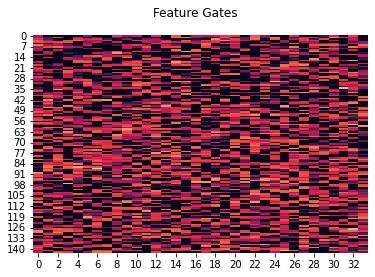

In [21]:
models, top_model = make_binary_models(
    input_dim_list, type="STG")
stg_history = train(models, top_model, train_loader, test_loader, 
                    save_dir='Checkpoints/stg-model-client1.pt',
                    log_dir='Logs/stg-model-client1.log',
                    mask_dir='Mask/client1/'
                    )

Epoch: 1, Train Loss: 13.6897, Train Acc: 0.3604, Test Acc: 0.4970, Best Acc: 0.497, Num Feats: 4862.0000, Num Emb: 384.0000
Epoch: 2, Train Loss: 13.3064, Train Acc: 0.4854, Test Acc: 0.4970, Best Acc: 0.497, Num Feats: 4862.0000, Num Emb: 384.0000
Epoch: 3, Train Loss: 13.3028, Train Acc: 0.4854, Test Acc: 0.4970, Best Acc: 0.497, Num Feats: 4862.0000, Num Emb: 384.0000
Epoch: 4, Train Loss: 13.1404, Train Acc: 0.4858, Test Acc: 0.5096, Best Acc: 0.5095881168177241, Num Feats: 4862.0000, Num Emb: 384.0000
Epoch: 5, Train Loss: 11.5157, Train Acc: 0.6375, Test Acc: 0.8761, Best Acc: 0.8761364551863041, Num Feats: 4862.0000, Num Emb: 384.0000
Epoch: 6, Train Loss: 8.9398, Train Acc: 0.9277, Test Acc: 0.9613, Best Acc: 0.9612673716012085, Num Feats: 4862.0000, Num Emb: 384.0000
Epoch: 7, Train Loss: 5.1015, Train Acc: 0.9728, Test Acc: 0.9710, Best Acc: 0.9709859013091642, Num Feats: 4862.0000, Num Emb: 384.0000
Epoch: 8, Train Loss: 3.5005, Train Acc: 0.9640, Test Acc: 0.9895, Best Acc

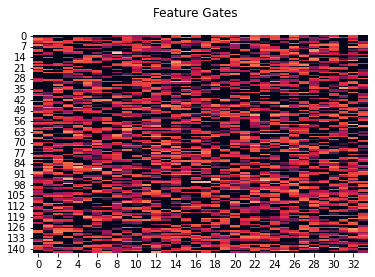

In [22]:
models, top_model = make_binary_models(
    input_dim_list, type="DualSTG")
dualstg_history = train(models, top_model, train_loader, test_loader, 
                    save_dir='Checkpoints/dualstg-model-client1.pt',
                    log_dir='Logs/dualstg-model-client1.log',
                    mask_dir='Mask/client1/'
                    )

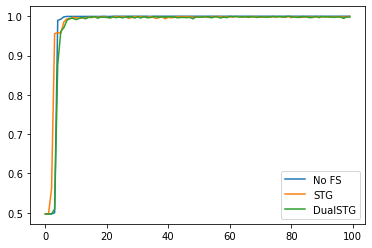

In [23]:
plt.plot(np.arange(100), no_fs_history['test_acc'], label='No FS')
plt.plot(np.arange(100), stg_history['test_acc'], label='STG')
plt.plot(np.arange(100), dualstg_history['test_acc'], label='DualSTG')
plt.legend()
plt.show()

---
# 3 Clients

In [30]:
train_loader, test_loader, input_dim_list = prepare_data(
    'BASEHOCK', num_clients=3)

Trying to load the datasets from BASEHOCK
(1993, 4862) (1993,)
Client 0: Feature Index 0-1215
Client 1: Feature Index 1216-2431
Client 2: Feature Index 2432-3646
Server : Feature Index 3647-4861


In [31]:
models, top_model = make_binary_models(
    input_dim_list, type="FNN")
no_fs_history = train(models, top_model, train_loader, test_loader)

Epoch: 1, Train Loss: 12.5037, Train Acc: 0.4854, Test Acc: 0.4970, Best Acc: 0.4970
Epoch: 2, Train Loss: 11.0613, Train Acc: 0.4854, Test Acc: 0.4970, Best Acc: 0.4970
Epoch: 3, Train Loss: 11.0878, Train Acc: 0.4854, Test Acc: 0.4970, Best Acc: 0.4970
Epoch: 4, Train Loss: 10.8776, Train Acc: 0.4981, Test Acc: 0.7931, Best Acc: 0.7931
Epoch: 5, Train Loss: 9.0244, Train Acc: 0.8568, Test Acc: 0.9595, Best Acc: 0.9595
Epoch: 6, Train Loss: 2.6676, Train Acc: 0.9495, Test Acc: 0.9910, Best Acc: 0.9910
Epoch: 7, Train Loss: 0.4742, Train Acc: 0.9897, Test Acc: 0.9990, Best Acc: 0.9990
Epoch: 8, Train Loss: 0.0858, Train Acc: 0.9990, Test Acc: 0.9990, Best Acc: 0.9990
Epoch: 9, Train Loss: 0.0746, Train Acc: 0.9985, Test Acc: 0.9995, Best Acc: 0.9995
Epoch: 10, Train Loss: 0.0460, Train Acc: 0.9990, Test Acc: 0.9995, Best Acc: 0.9995
Epoch: 11, Train Loss: 0.0362, Train Acc: 0.9995, Test Acc: 0.9995, Best Acc: 0.9995
Epoch: 12, Train Loss: 0.0336, Train Acc: 0.9990, Test Acc: 0.9995, Be

Epoch: 1, Train Loss: 13.7636, Train Acc: 0.4854, Test Acc: 0.4970, Best Acc: 0.497, Num Feats: 4862.0000
Epoch: 2, Train Loss: 12.2869, Train Acc: 0.4854, Test Acc: 0.4970, Best Acc: 0.497, Num Feats: 4862.0000
Epoch: 3, Train Loss: 12.2673, Train Acc: 0.4854, Test Acc: 0.4970, Best Acc: 0.497, Num Feats: 4862.0000
Epoch: 4, Train Loss: 12.2096, Train Acc: 0.4854, Test Acc: 0.4970, Best Acc: 0.497, Num Feats: 4862.0000
Epoch: 5, Train Loss: 11.9506, Train Acc: 0.5137, Test Acc: 0.9603, Best Acc: 0.9602955689828802, Num Feats: 4862.0000
Epoch: 6, Train Loss: 9.6270, Train Acc: 0.8118, Test Acc: 0.9065, Best Acc: 0.9602955689828802, Num Feats: 4862.0000
Epoch: 7, Train Loss: 5.1953, Train Acc: 0.8873, Test Acc: 0.9679, Best Acc: 0.9679471299093656, Num Feats: 4862.0000
Epoch: 8, Train Loss: 2.5215, Train Acc: 0.9645, Test Acc: 0.9865, Best Acc: 0.9864753272910373, Num Feats: 4862.0000
Epoch: 9, Train Loss: 2.0169, Train Acc: 0.9749, Test Acc: 0.9935, Best Acc: 0.9934788519637463, Num Fe

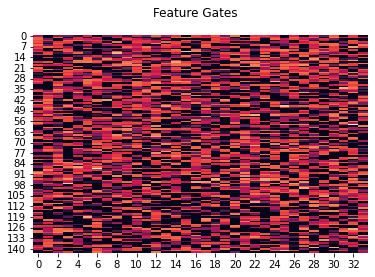

In [32]:
models, top_model = make_binary_models(
    input_dim_list, type="STG")
stg_history = train(models, top_model, train_loader, test_loader, 
                    save_dir='Checkpoints/stg-model-client1.pt',
                    log_dir='Logs/stg-model-client1.log',
                    mask_dir='Mask/client1/'
                    )

Epoch: 1, Train Loss: 13.7287, Train Acc: 0.2393, Test Acc: 0.4970, Best Acc: 0.497, Num Feats: 4862.0000, Num Emb: 512.0000
Epoch: 2, Train Loss: 13.3085, Train Acc: 0.4854, Test Acc: 0.4970, Best Acc: 0.497, Num Feats: 4862.0000, Num Emb: 512.0000
Epoch: 3, Train Loss: 13.3088, Train Acc: 0.4854, Test Acc: 0.5025, Best Acc: 0.5025281973816716, Num Feats: 4862.0000, Num Emb: 512.0000
Epoch: 4, Train Loss: 13.2679, Train Acc: 0.5050, Test Acc: 0.7976, Best Acc: 0.7976042296072507, Num Feats: 4862.0000, Num Emb: 512.0000
Epoch: 5, Train Loss: 12.8585, Train Acc: 0.5689, Test Acc: 0.8283, Best Acc: 0.8283157099697885, Num Feats: 4862.0000, Num Emb: 512.0000
Epoch: 6, Train Loss: 10.8507, Train Acc: 0.7917, Test Acc: 0.9648, Best Acc: 0.9648272910372608, Num Feats: 4862.0000, Num Emb: 512.0000
Epoch: 7, Train Loss: 6.5688, Train Acc: 0.9629, Test Acc: 0.9575, Best Acc: 0.9648272910372608, Num Feats: 4862.0000, Num Emb: 512.0000
Epoch: 8, Train Loss: 4.0344, Train Acc: 0.9485, Test Acc: 0.

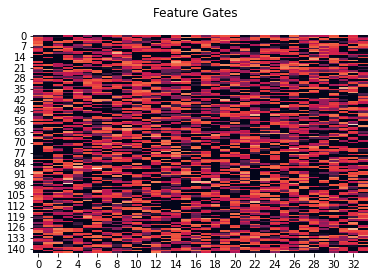

In [33]:
models, top_model = make_binary_models(
    input_dim_list, type="DualSTG")
dualstg_history = train(models, top_model, train_loader, test_loader, 
                    save_dir='Checkpoints/dualstg-model-client1.pt',
                    log_dir='Logs/dualstg-model-client1.log',
                    mask_dir='Mask/client1/'
                    )

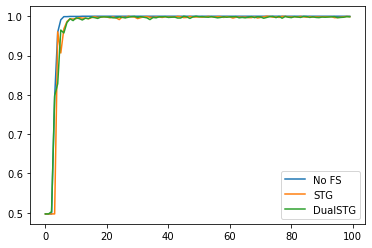

In [34]:
plt.plot(np.arange(100), no_fs_history['test_acc'], label='No FS')
plt.plot(np.arange(100), stg_history['test_acc'], label='STG')
plt.plot(np.arange(100), dualstg_history['test_acc'], label='DualSTG')
plt.legend()
plt.show()

---
# Clients = 5

In [35]:
train_loader, test_loader, input_dim_list = prepare_data(
    'BASEHOCK', num_clients=5)

Trying to load the datasets from BASEHOCK
(1993, 4862) (1993,)
Client 0: Feature Index 0-810
Client 1: Feature Index 811-1621
Client 2: Feature Index 1622-2431
Client 3: Feature Index 2432-3241
Client 4: Feature Index 3242-4051
Server : Feature Index 4052-4861


In [ ]:
models, top_model = make_binary_models(
    input_dim_list, type="FNN")
no_fs_history = train(models, top_model, train_loader, test_loader)

In [ ]:
models, top_model = make_binary_models(
    input_dim_list, type="STG")
stg_history = train(models, top_model, train_loader, test_loader, 
                    save_dir='Checkpoints/stg-model-client1.pt',
                    log_dir='Logs/stg-model-client1.log',
                    mask_dir='Mask/client1/'
                    )

In [36]:
models, top_model = make_binary_models(
    input_dim_list, type="DualSTG")
dualstg_history = train(models, top_model, train_loader, test_loader, 
                    save_dir='Checkpoints/dualstg-model-client1.pt',
                    log_dir='Logs/dualstg-model-client1.log',
                    mask_dir='Mask/client1/'
                    )